In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
data = pd.read_csv('/content/Filtered_data.csv')
data.head()

In [ ]:
label = data['Class']
label.head()

In [ ]:
X = data.drop('Class',1)
X = X.drop('Unnamed: 0', 1)
X.head()

In [ ]:
Y = pd.DataFrame(data=label, columns=['Class'])
Y.head()

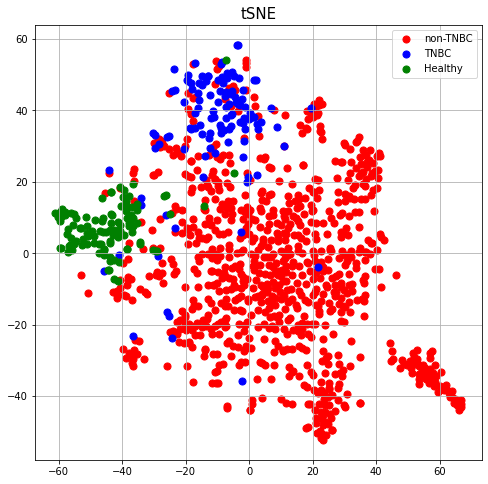

In [ ]:
tsne = TSNE(n_components=2, random_state=10,perplexity=15, learning_rate=800)
tsne_rnaexp = tsne.fit_transform(X)
tsne_df = pd.DataFrame(data=tsne_rnaexp, columns=['tsne 1', 'tsne 2'])
tsne_concat_df = pd.concat([tsne_df, Y['Class']], axis=1)
fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.set_title('tSNE', fontsize=15)
labels_list_2 = ['non-TNBC', 'TNBC', 'Healthy']
colors_2 = ['r', 'b', 'g']

for lab, color in zip(labels_list_2, colors_2):
    indices_2 = tsne_concat_df['Class'] == lab
    ax_2.scatter(tsne_concat_df.loc[indices_2, 'tsne 1'],
              tsne_concat_df.loc[indices_2, 'tsne 2'], 
              c = color,
              s = 50)
    ax_2.legend(labels_list_2)
    ax_2.grid()

In [1]:
def model_train(X_train, X_test, y_train, y_test):
  models = []
  models.append(('KNN', KNeighborsClassifier(n_neighbors = 3))) #add KNN #model, explore num of neighbors
  models.append(('DT', DecisionTreeClassifier(max_depth=5))) #add KNN #model, explore num of neighbors
  models.append(('RF', RandomForestClassifier())) #add KNN #model, explore num of neighbors
  models.append(('NB', GaussianNB())) #add KNN #model, explore num of neighbors
  models.append(('SVM-Poly', SVC(kernel = 'poly', random_state = 10))) #add KNN #model, explore num of neighbors

  # Evaluate each model in turn

  #gets results and names
  results = []
  names = []

  # create a for loop for each of models defined previously

  for name, model in models:
      
      # k fold training will take place and will run 10 times, 
      # giving the average accuracy for each of them
      # we do not want a random state so we go from seed
      kfold = model_selection.KFold(n_splits = 5, random_state = seed)
      
      # model_selection.cross_val_score evaluates a score by cross- validation
      # paramaters of model_selection.cross_val_score:
          # X (array- like): The data to fit. Can be for example a list, or an array.
          # y (array- like): The target variable to try to predict in the case of supervised learning
          # groups (array- like, with shape): group labels for the samples used while splitting the 
          #dataset into train/test set
          # scoring (string): A string (see model evaluation documentation) 
          #or a scorer callable object / function with signature scorer(estimator, X, y)
          #which should return only a single value (Similar to cross_validate but only a single metric is permitted)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, 
                                                  cv = kfold, scoring = scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)
  for name, model in models: 
      # we will do the model.fit, and it will train it once again on the X and y 
      #training data. Since we want to make predictions, we're going to use the 
      #model to actually make a prediction about the X_test data
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)
      # Once the model has been trained, we're going to use it to make a
      # prediction. It will print out the name, the accuracy score (based 
      # on a comparison of the y_test data with the predictions we made), 
      #and a classification_report, which will tell us information about the 
      #false positives and negatives that we found
      print(name)
      print(accuracy_score(y_test, predictions))
      print(classification_report(y_test, predictions))

In [2]:
seed = 8 # adding a seed will make a data reproducible, 
         # adding random seed which will change results little bit 
         # each time
scoring = 'accuracy'

In [ ]:
X = np.array(data.drop(['Class'],1))
y = np.array(data['Class'])
scaler = StandardScaler().fit(X)
X=scaler.transform(X)
for i in range (1, 5):
  print('Stat for iteration :', i)
  X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)
  model_train(X_train, X_test, y_train, y_test)